# Face Detection

A detecção de rosto é uma tecnologia de computador usada em uma variedade de aplicações que identifica rostos humanos em imagens digitais.

## Cascade Classification

Uma das principais coisas que podemos fazer com a visão é detectar objetos.

A detecção de objetos usando **Haar feature-based cascade classifiers** é um método eficaz de detecção de objetos proposto por Paul Viola e Michael Jones no seu [artigo](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) e aprimorado posteriormente por [Rainer Lienhart](http://wiki.opencv.org.cn/images/5/52/MRL-TR-May02-revised-Dec02.pdf).

É uma abordagem baseada em Machine Learning em que uma função em cascata é treinada a partir de muitas imagens positivas e negativas. Em seguida, é usado para detectar objetos em outras imagens.

O OpenCV fornece um método de treinamento (consulte [Cascade Classifier Training](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html)) ou modelos pré-treinados, que podem ser lidos usando o método **cv2.CascadeClassifierload**. Os modelos pré-treinados estão localizados na pasta de dados da instalação do OpenCV ou podem ser encontrados [aqui](https://github.com/opencv/opencv/tree/3.4/data).

Neste notebook, vamos experimentar com alguns dos modelos de haarcascades pré-treinados fornecidos. Mais sobre este tópico pode ser encontrado [aqui](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html).

Como de costume, começamos importando as bibliotecas necesssárias.

In [1]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

Carregamos a imagem de teste e criamos uma cópia em tons de cinza dela para ser usada nos classificadores.

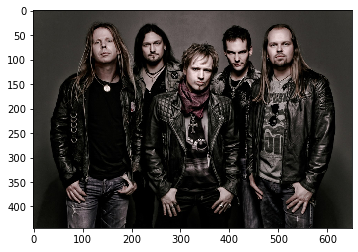

In [2]:
base_image = cv2.imread('imagens/edguy.jpg')
gray = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB));

Usaremos o modelo pré-treinado `haarcascade_frontalface_default.xml` para detectar rostos na foto. 

Você pode encontrar mais detalhes sobre os parâmetros da função **detectMultiScale** [aqui](https://docs.opencv.org/3.4/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498).

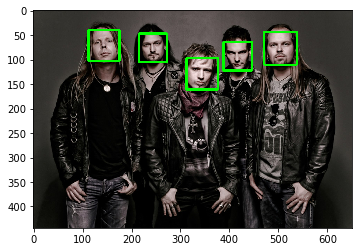

In [4]:
face_cascade = cv2.CascadeClassifier('detect/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
     cv2.rectangle(base_image,(x,y),(x+w,y+h),(0,255,0),3)
        
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB));

Também podemos usar o modelo `haarcascade_eye.xml` para detectar olhos em fotos.

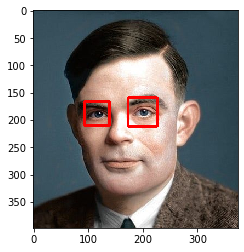

In [12]:
image = cv2.imread('imagens/turing.jpg')
g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

eye_cascade = cv2.CascadeClassifier('detect/haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(g, 1.3, 1)

for (x,y,w,h) in eyes:
     cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),3)
        
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

Outrao opção que temos é definir uma função para detectar faces, por exemplo:

In [21]:
def detect_faces_show(fpath):
    img = cv2.imread(fpath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Detecta faces na imagem
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    print(f"Encontradas {len(faces)} faces na imagem")

    # Desenha um retângulo em volta das faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

Encontradas 4 faces na imagem


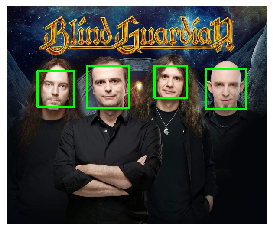

In [22]:
detect_faces_show('imagens/blind_guardian.jpg')

Embora a maior parte desse tipo de detecção de objeto tenha sido substituída recentemente na indústria por soluções baseadas em modelos de Deep Neural Networks criados e treinados em plataformas como **[TensorFlow](https://www.tensorflow.org/)**, o método Viola Jones para detecção de rosto ainda é um detector muito respeitado. E mesmo em sistemas modernos baseados em DNN, o OpenCV ainda é amplamente usado para manipulação de imagens, pré e pós-processamento.